##Contabilizando os Resultados do Experimento 1.1

###Configuração do Experimento:

Pré-processamento: Com Stopwords

Segmentação Sentencial: Segmentation_v1 (sent_tokenize do nltk)

Modelo de Lingua Utilizado no Bertopic: multilingual e n-grama(4,4)

Descrição dos Temas: description_full (Completa e tudo minúsculo, como no sistema do STJ)

Função de Similaridade: média dos valores de similaridade de cada termo do tópico mais frequente. Uso da função de similaridade do spacy
    

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

caminho = '/content/drive/My Drive/Colab Notebooks/'
#caminhos = [os.path.join('/content/drive/My Drive/Colab Notebooks/acordaos_tema_exclusivo/1015/', nome) for nome in os.listdir('/content/drive/My Drive/Colab Notebooks/acordaos_tema_exclusivo/1015/')]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
result = pd.read_csv(caminho+'Resultado1.1 - Experimentos dos 3k.csv')
result.head()

,id,Tema Classificado,Valor Tema Classificado,Tema Real
0,37545,1033,0,1046
1,72946,1033,0,1046
2,10395,1039,0,1046
3,2004,1033,0,1046
4,42430,1033,0,1046


In [ ]:
true = []
pred = []
for i in range(len(result)):
  true.append(result.iloc[i].at['Tema Real'])
  pred.append(result.iloc[i].at['Tema Classificado'])
y_true = np.array(true)
y_pred = np.array(pred)

In [ ]:
len(pred)

648

In [ ]:
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.28180196253345224, 0.2801269906656266, 0.2268491932094815, None)

In [ ]:
precision_recall_fscore_support(y_true, y_pred, average='micro')

(0.10493827160493827, 0.10493827160493827, 0.10493827160493827, None)

In [ ]:
precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.1967907842424643, 0.10493827160493827, 0.10027587464251762, None)

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred)
cm

array([[  1,   0,   0,   0,   0,   0],
       [  0,   0,  19,  42,   0,   1],
       [  0,   1,  50, 213,   1,   2],
       [  0,   0,  13,  11,   2,   0],
       [  0,   1, 126,  71,   1,  17],
       [  0,   0,  28,  43,   0,   5]])

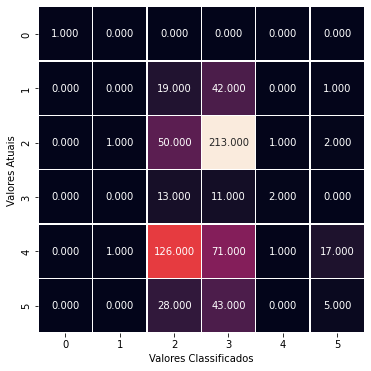

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Valores Atuais')
plt.xlabel('Valores Classificados')
plt.show()

In [ ]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         929       1.00      1.00      1.00         1
        1015       0.00      0.00      0.00        62
        1033       0.21      0.19      0.20       267
        1039       0.03      0.42      0.05        26
        1046       0.25      0.00      0.01       216
        1101       0.20      0.07      0.10        76

    accuracy                           0.10       648
   macro avg       0.28      0.28      0.23       648
weighted avg       0.20      0.10      0.10       648

